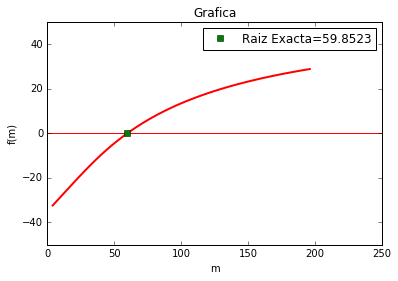


Por metodo de falsa posicion:

╒═════════╤═══════════════════╤═════════════════════╕
│    f(m) │ Erpv              │ Ea                  │
╞═════════╪═══════════════════╪═════════════════════╡
│ 59.8462 │ 0.0102245892037 % │ ----- %             │
├─────────┼───────────────────┼─────────────────────┤
│ 59.8412 │ 0.0185279400034 % │ 0.00830488952462 %  │
├─────────┼───────────────────┼─────────────────────┤
│ 59.8411 │ 0.0187960962029 % │ 0.000268206611906 % │
╘═════════╧═══════════════════╧═════════════════════╛


In [29]:
import math
from tabulate import tabulate
import matplotlib.pyplot as plt
%matplotlib inline

tabla=[]
valores=[]
funcion=[]
tabla=[]
ErrorA=[]
raices=[]
g=9.8
c=15.0
v=35.0
t=9.0
Es=0.1
f1,f2,f3=1.0,1.0,1.0
xVerd=59.8523
xl=55.0
xu=60.0
xr=0.0
Es=0.001

for i in range(-10, 200):
    if(i==0):
        continue
    m=i
    fmasa=((g*m)/c)*(1-math.pow(math.e,-(c/m)*t))-v
    if(m>0 and m%4==0):
        valores.append(m)
        funcion.append(fmasa)
       
        
def resultado(m):
    fm=((g*m)/c)*(1-math.pow(math.e,(-c/m)*t))-v
    return fm

b=0
while 1:
    f1=resultado(xl)
    f2=resultado(xu)
    xr=xu-(f2*(xl-xu))/(f1-f2)
    raices.append(xr)
    f3=resultado(xr)
    erpv=math.fabs(((xVerd-xr)/xVerd)*100)
    if(b==0):
        ErrorA.append("-----")
        eaprx=100
    else:
        k=b-1
        eaprx=math.fabs(((raices[b]-raices[k])/raices[b])*100)
        ErrorA.append(eaprx)
    tabla.append([xr, str(erpv)+" %", str(ErrorA[b])+" %"])
    if ((f1*f3)<0):
        xu=xr
    if((f1*f3)>0):
         xl=xr 
    if(eaprx<Es):
        break
    b+=1   
plt.title("Grafica")
plt.axis([0, 250, -50, 50])
plt.ylabel('f(m)')
plt.xlabel('m')
plt.axhline(0, color="red")
plt.plot(valores, funcion, 'r-', linewidth=2)
plt.plot(xVerd,0, 'gs', label='Raiz Exacta=59.8523')
plt.legend(loc = 'upper right', numpoints = 1)
plt.show()

print "\nFalsa posicion:\n"
print tabulate(tabla, headers=["f(m)","Erpv","Ea"], tablefmt="fancy_grid")